# Imports

In [15]:
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import utils
from prophet import Prophet
from pathlib import Path

In [3]:
X, y = utils.get_train_data()

In [4]:
len(y), X.shape

(496827, (496827, 10))

In [5]:
def train_test_split_temporal(X, y, delta_threshold="30 days"):
    cutoff_date = X["date"].max() - pd.Timedelta(delta_threshold)
    mask = X["date"] <= cutoff_date
    X_train, X_test = X.loc[mask], X.loc[~mask]
    y_train, y_test = y[mask], y[~mask]

    return X_train, y_train, X_test, y_test

In [6]:
X_train, y_train, X_test, y_test = train_test_split_temporal(
    X, y, delta_threshold="30 days"
)

# PROPHET

In [7]:
# creating a df for prophet
df_train = X_train.reset_index().copy()

df_train["y"] = pd.Series(y_train)

df_train = df_train[["date", "latitude", "longitude", "y"]]
df_train.rename(columns={"date": "ds"}, inplace=True)

In [8]:
df_train.head()

,ds,latitude,longitude,y
0,2020-09-01 01:00:00,48.840801,2.333233,1.609438
1,2020-09-01 01:00:00,48.840801,2.333233,1.386294
2,2020-09-01 01:00:00,48.853720,2.357020,0.000000
3,2020-09-01 01:00:00,48.853720,2.357020,0.693147
4,2020-09-01 01:00:00,48.885290,2.326660,2.079442


In [9]:
model = Prophet()

In [10]:
model.add_regressor("latitude")
model.add_regressor("longitude")

model.fit(df_train)

14:56:50 - cmdstanpy - INFO - Chain [1] start processing
14:57:25 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# creating a df for prophet
df_test = X_test.reset_index().copy()

df_test["y"] = pd.Series(y_test)

df_test = df_test[["date", "latitude", "longitude", "y"]]
df_test.rename(columns={"date": "ds"}, inplace=True)

In [12]:
future = model.make_future_dataframe(periods=30)  # Adjust 'periods' as needed

# Add future values for your regressors
future["latitude"] = df_test["latitude"]  # Replace with your future data
future["longitude"] = df_test["longitude"]

In [13]:
forecast = model.predict(future)

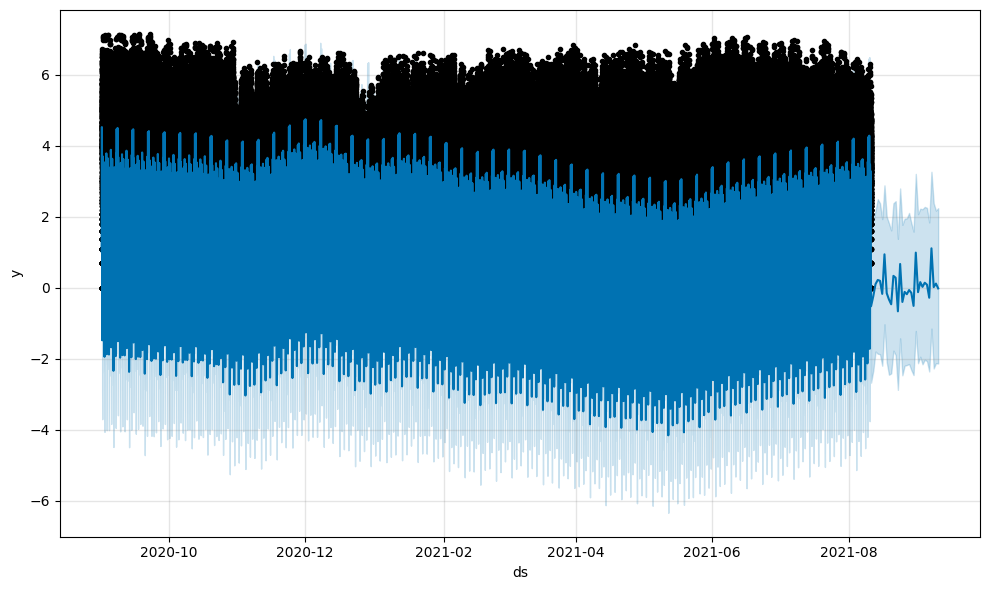

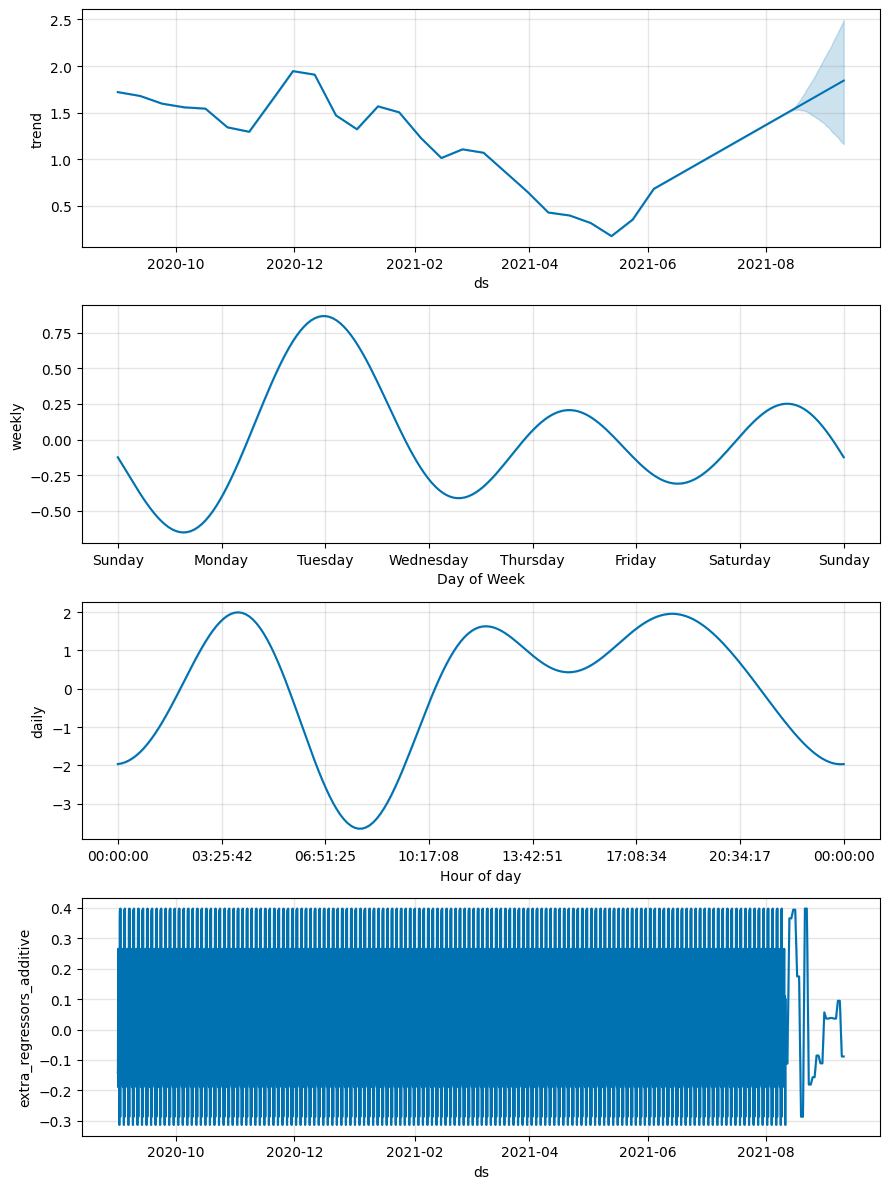

In [14]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

# XGBoost

In [19]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 173.3 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'xgboost'

In [17]:
df_test = pd.read_parquet(Path("data") / "final_test.parquet")
X_train, y_train = utils.get_train_data()